#Hugging Face

In [1]:
!pip install nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 16.9 MB/s eta 0:00:00


In [2]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 36.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 23.8 MB/s eta 0:00:00


In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
from datasets import load_dataset
from tensorflow.keras.preprocessing.text import Tokenizer

In [4]:
def show_history(h):
  epochs_trained = len(h.history['loss'])
  plt.figure(figsize=(16, 6))
  plt.subplot(1, 2, 1)
  plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
  plt.ylim( [0., 1.])
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.subplot(1, 2, 2)
  plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
  plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

def show_confusion_matrix(y_true, y_pred, classes):
  from sklearn.metrics import confusion_matrix

  cm = confusion_matrix(y_true, y_pred, normalize='true')

  plt.figure(figsize =(8, 8))
  sp = plt.subplot(1, 1, 1)
  ctx = sp.matshow(cm)
  plt.xticks (list (range(0, 6)), labels= classes)
  plt.yticks (list (range(0, 6)), labels=classes)
  plt.colorbar(ctx)
  plt.show()


In [5]:
dataset = load_dataset("dair-ai/emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/dair-ai___emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [7]:
train = dataset["train"]
val =  dataset["validation"]
test =  dataset["test"]

In [8]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets, labels

In [9]:
tweets, labels = get_tweet(train)

In [10]:
tweets[4], labels[4]

('i am feeling grouchy', 3)

In [11]:
tokenizer = Tokenizer(num_words= 1000,oov_token = '<UNK>')
tokenizer.fit_on_texts(tweets)

In [12]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

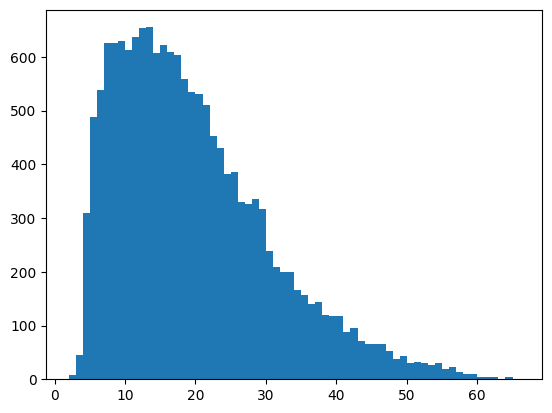

In [13]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist (lengths,bins=len(set(lengths)))
plt.show()

In [16]:
class_to_index=dict((c,i) for i,c in enumerate(classes))
index_to_class=dict((v,k) for k,v in class_to_index.items())

In [17]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [18]:
index_to_class

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [19]:
names_to_ids=lambda labels:np.array([class_to_index.get(x) for x in labels])

In [20]:
train_labels =names_to_ids(labels)
print (train_labels[4])

3


In [21]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [22]:
def get_sequences (tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences (tweets)
  padded = pad_sequences(sequences, truncating ='post', padding ='post',maxlen=maxlen)
  return padded


In [23]:
padded_train_seq = get_sequences (tokenizer, tweets)

In [24]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [15]:
classes = set(labels)
print(labels)

[0, 0, 3, 2, 3, 0, 5, 4, 1, 2, 0, 1, 3, 0, 1, 1, 0, 0, 0, 4, 3, 4, 1, 1, 3, 0, 0, 0, 3, 1, 1, 4, 5, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 3, 1, 0, 3, 4, 1, 0, 0, 5, 1, 1, 1, 2, 4, 4, 5, 3, 3, 0, 2, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 3, 0, 3, 3, 3, 1, 1, 1, 1, 0, 4, 2, 3, 0, 3, 2, 0, 1, 1, 0, 3, 2, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 1, 1, 0, 1, 1, 4, 4, 4, 0, 2, 1, 1, 2, 4, 5, 1, 1, 1, 1, 3, 4, 1, 3, 2, 3, 0, 1, 0, 3, 1, 5, 0, 3, 3, 0, 1, 4, 1, 1, 4, 0, 5, 5, 1, 3, 4, 3, 0, 3, 0, 4, 0, 1, 5, 4, 1, 3, 1, 3, 1, 4, 4, 0, 1, 1, 0, 5, 1, 4, 1, 0, 1, 1, 1, 4, 1, 5, 1, 3, 0, 0, 1, 3, 0, 1, 1, 5, 1, 4, 1, 4, 0, 4, 2, 0, 4, 2, 0, 0, 3, 1, 2, 3, 0, 5, 3, 1, 0, 3, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 3, 5, 1, 3, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 4, 0, 3, 0, 3, 2, 1, 2, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 2, 0, 3, 0, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 1, 4, 1, 3, 3, 2, 0, 5, 1, 3, 0, 0, 3, 2, 5, 0, 2, 1, 3, 1, 0, 0, 1, 1, 4, 0, 3, 1, 2, 1, 1, 

In [25]:
model=tf.keras.models.Sequential ([
              tf.keras.layers.Embedding(1000, 16, input_length=maxlen),
              tf.keras.layers.Bidirectional (tf.keras.layers.LSTM (20, return_sequences=True)),
              tf.keras.layers.Bidirectional (tf.keras.layers.LSTM (20)),
              tf.keras.layers.Dense(6, activation='softmax')
  ])
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 31,926
Trainable params: 31,926
Non-trainable params: 0
_________________________________________________________________


In [27]:
val_tweets, val_labels=get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [28]:
val_tweets[1],val_labels[1]

('i feel like i am still looking at a blank canvas blank pieces of paper', 0)

In [29]:
print(type(train_labels))

<class 'numpy.ndarray'>


In [30]:
h = model.fit(
  padded_train_seq,train_labels,
  validation_data=(val_seq,val_labels),
  epochs = 20,
  callbacks= [
      tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                       patience=2
                                       )
  ]
)

Epoch 1/20
500/500 [==============================] - 48s 72ms/step - loss: 1.3542 - accuracy: 0.4674 - val_loss: 0.8875 - val_accuracy: 0.7005
Epoch 2/20
500/500 [==============================] - 11s 22ms/step - loss: 0.6069 - accuracy: 0.7961 - val_loss: 0.5142 - val_accuracy: 0.8300
Epoch 3/20
500/500 [==============================] - 8s 17ms/step - loss: 0.4308 - accuracy: 0.8523 - val_loss: 0.4382 - val_accuracy: 0.8465
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3738 - accuracy: 0.8697 - val_loss: 0.4366 - val_accuracy: 0.8440
Epoch 5/20
500/500 [==============================] - 8s 15ms/step - loss: 0.3352 - accuracy: 0.8796 - val_loss: 0.4079 - val_accuracy: 0.8565
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3176 - accuracy: 0.8856 - val_loss: 0.3997 - val_accuracy: 0.8615
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2979 - accuracy: 0.8889 - val_loss: 0.3986 - val_accuracy: 0.85

In [ ]:
show_history(h)

In [31]:
test_tweets, test_labels=get_tweet(test)
test_seq=get_sequences (tokenizer, test_tweets)
test_labels=names_to_ids(test_labels)

In [32]:
_=model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.3826 - accuracy: 0.8570


In [33]:
i=100
print('sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])
p=model.predict (np.expand_dims (test_seq[i], axis=0))[0]
pred_class=index_to_class [np.argmax (p).astype('uint8')]
print('Predicted Emotion:', pred_class)

sentence: i feel needy but comfortable with it i feel vulnerable but secure i feel the urge to cum hard but i get no relief
Emotion: 0
1/1 [==============================] - 1s 1s/step
Predicted Emotion: 0


In [34]:
preds= model.predict(test_seq)
classes_x= np.argmax (preds, axis =1)

63/63 [==============================] - 0s 5ms/step


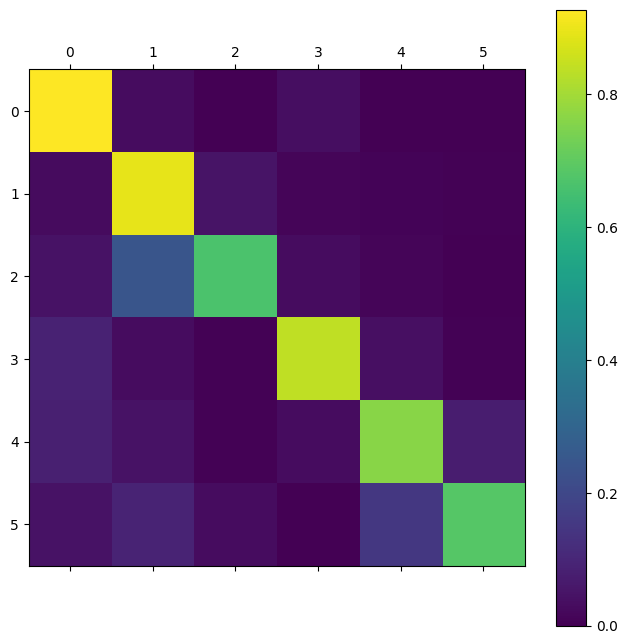

In [35]:
show_confusion_matrix(test_labels, classes_x, list(classes))

In [36]:
emotion = model.predict(padded_test)

NameError: ignored

In [ ]:
padded_test = get_sequences (tokenizer, "i am feeling grouchy")

In [39]:
input_text = "today is a very happy day"
input_seq = get_sequences(tokenizer, [input_text])
print(input_seq)
pred = model.predict(input_seq)
emotion_label = index_to_class[np.argmax(pred)]
print(emotion_label)

[[122  22   7  46 154  97   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0]]
1/1 [==============================] - 0s 38ms/step
1


In [42]:
def convert_pred_to_emotion(pred):
    emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
    return emotions[pred]

print(convert_pred_to_emotion(emotion_label))

joy


In [43]:
import joblib
# Save the trained model for Likes
joblib.dump(model, 'emootion.pkl')

['emootion.pkl']

In [38]:
import pickle

# Save the tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
import pickle
with open('emotion.pkl', 'wb') as f:
    pickle.dump(model, f)

In [47]:
model.save('emotion_h5.h5')


In [ ]:
import pandas as pd
import joblib
from google.colab import drive

from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
emotion_model = joblib.load("emtion.pkl")

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def bad_line(x):
  print(x)
  return None

df_data = pd.read_csv('/content/drive/Othercomputers/My Laptop (1)/year4/fyp_repo/social_lifter/data_science/final/data_sentiment_final.csv', on_bad_lines=bad_line, engine='python')
print(df_data.shape)

(1150394, 26)


In [ ]:
df_data['clean_tweet'] = df_data['clean_tweet'].astype(str)

In [ ]:
split_data = np.array_split(df_data, 10)

In [ ]:

emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
tokenizer = Tokenizer(num_words= 1000,oov_token = '<UNK>')
tokenizer.fit_on_texts(split_data[0]['clean_tweet'])
def get_emotion(tweet):
    input_seq = get_sequences(tokenizer, [tweet])
    pred = emotion_model.predict(input_seq)
    emotion = emotions[np.argmax(pred)]
    return emotion

split_data[0]['emotion'] = split_data[0]['clean_tweet'].apply(get_emotion)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - ETA: 0s

In [ ]:
split_data[0].to_csv('data_sentiment_emotion_final_0.csv', index=False)

In [ ]:
df_data.head()

NameError: ignored